In [1]:
import time
import wave

import matplotlib.pyplot as plt
import numpy as np
import pyaudio
from scipy.signal import spectrogram
import torch
import torchaudio


chunk = 1024
sample_format = pyaudio.paInt16
channels = 1
fs = 16000
seconds = 3

In [2]:
for i in range(3, 0, -1):
    print(f'Recording in {i}', end='\r')
    time.sleep(1)
print('Now Recording!')

p = pyaudio.PyAudio()

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

# Store data in chunks for 3 seconds
frames = []
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)
    
stream.stop_stream()
stream.close()
p.terminate()

buffer_data = b''
for data in frames:
    buffer_data += data

print('Recording finished')

Now Recording!
Recording finished


In [3]:
p = pyaudio.PyAudio()

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                output=True)

for data in frames:
    stream.write(data)
    
stream.close()
p.terminate()

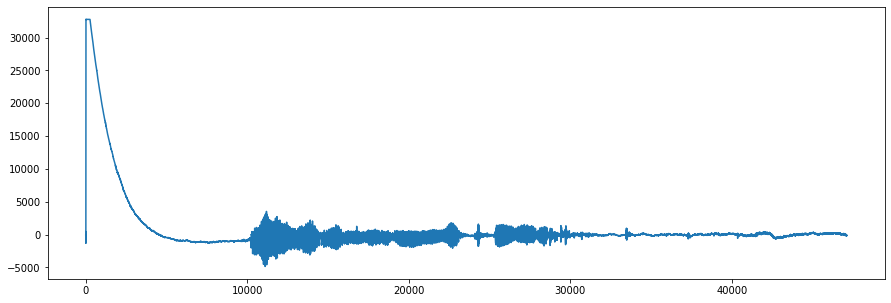

In [4]:
signal = torch.from_numpy(np.frombuffer(buffer_data, dtype=np.int16)).float()

plt.figure(figsize=(15, 5))
plt.plot(signal)
plt.show()

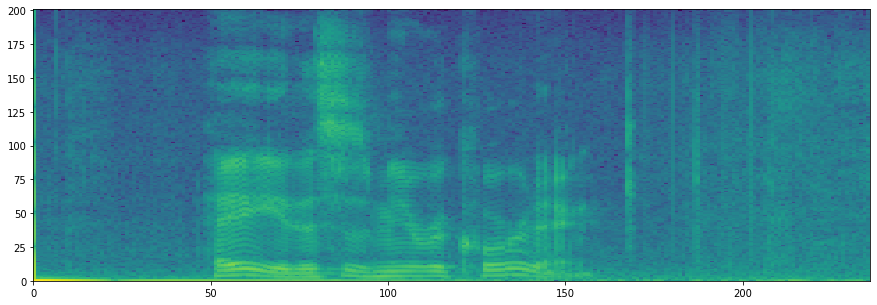

In [5]:
spec = torchaudio.transforms.Spectrogram()
spec_data = spec(signal / signal.norm())
plt.figure(figsize=(15, 5))
plt.pcolormesh(10*np.log10(spec_data))
plt.show()

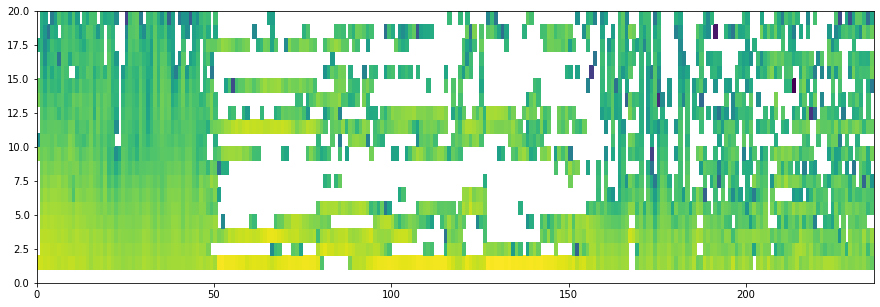

In [6]:
mfcc = torchaudio.transforms.MFCC(sample_rate=fs, n_mfcc=20)
mfcc_data = mfcc(signal / signal.norm())
mfcc_data = 10*torch.log10(mfcc_data)

plt.figure(figsize=(15, 5))
plt.pcolormesh(mfcc_data)
plt.show()